# Master D2SN – Traces numériques et dynamiques de l’innovation
# Etude d’Open Food Facts

### PHAM Dong Pha
### June Camille Ménard
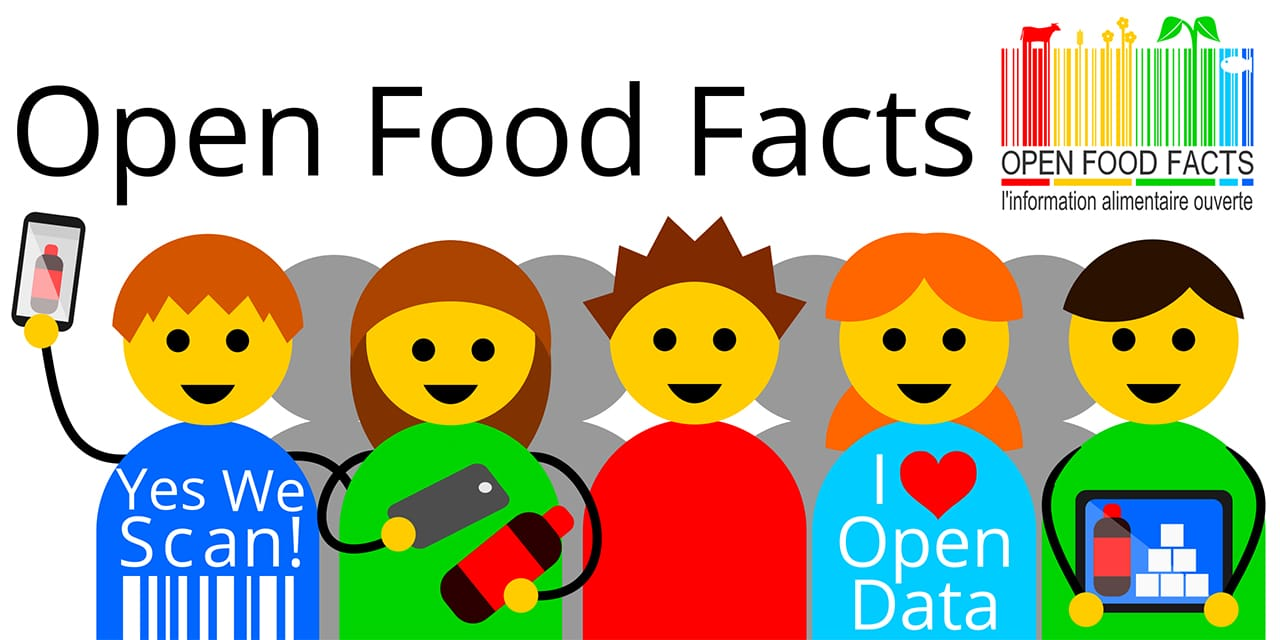

### Nous avons recherché le terme de produit «blé» et téléchargé les données sur le site Web: Open Fact Food. Nous avons une base de données avec plus de 7000 produits

### Nous allons maintenant utiliser ces ensembles de données à bon escient en explorant les données à l'aide de méthodes telles que le regroupement, la visualisation et les tests d'hypothèses. Nous devons d'abord importer certains packages dont nous aurons besoin pour l'exploration.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import re
import sqlite3
from datetime import datetime
from pandas import Series, DataFrame
sns.set()
%matplotlib inline

In [58]:
data = pd.read_csv("C:/Users/phamd/Downloads/openfoodfacts_search.csv")

C:\Users\phamd\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3050: DtypeWarning: Columns (0,6,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [59]:
data.head()

,code,url,creator,created_t,last_modified_t,product_name,abbreviated_product_name,generic_name,quantity,packaging,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,3760247570137,https://fr.openfoodfacts.org/produit/376024757...,kiliweb,1621876151,1621876153,Blé poulard,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3700977701012,https://fr.openfoodfacts.org/produit/370097770...,kiliweb,1563014460,1621861686,Poulet aux 5 légumes du soleil et son blé,NaN,NaN,300 g,"fr:Etui en carton, fr:Film en plastique",...,122.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7613037397956,https://fr.openfoodfacts.org/produit/761303739...,kiliweb,1570024144,1621857748,LE BON VEGETAL Steak Cru Soja Blé à Griller 2x...,NaN,NaN,226 g,Plástico,...,NaN,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3770019493014,https://fr.openfoodfacts.org/produit/377001949...,foodvisor,1621854431,1621854431,Farine de blé,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3256540035126,https://fr.openfoodfacts.org/produit/325654003...,openfoodfacts-contributors,1428781797,1621847866,Brioche Tressée Tranchée Pépites,NaN,Brioche tressée au levain et aux pépites de ch...,1,"Sachet plastique à jeter, fr:Clip en plastique...",...,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
print('Il y a {:,} lignes '.format(data.shape[0]) + 'et {} colonnes dans ce dataset'.format(data.shape[1]))

Il y a 7,023 lignes et 174 colonnes dans ce dataset


In [61]:
# On liste toutes les colonnes
sorted(data.columns.tolist())

['-alpha-linolenic-acid_100g',
 '-arachidic-acid_100g',
 '-arachidonic-acid_100g',
 '-behenic-acid_100g',
 '-butyric-acid_100g',
 '-capric-acid_100g',
 '-caproic-acid_100g',
 '-caprylic-acid_100g',
 '-cerotic-acid_100g',
 '-dihomo-gamma-linolenic-acid_100g',
 '-docosahexaenoic-acid_100g',
 '-eicosapentaenoic-acid_100g',
 '-elaidic-acid_100g',
 '-erucic-acid_100g',
 '-fructose_100g',
 '-gamma-linolenic-acid_100g',
 '-glucose_100g',
 '-gondoic-acid_100g',
 '-insoluble-fiber_100g',
 '-lactose_100g',
 '-lauric-acid_100g',
 '-lignoceric-acid_100g',
 '-linoleic-acid_100g',
 '-maltodextrins_100g',
 '-maltose_100g',
 '-mead-acid_100g',
 '-melissic-acid_100g',
 '-montanic-acid_100g',
 '-myristic-acid_100g',
 '-nervonic-acid_100g',
 '-oleic-acid_100g',
 '-palmitic-acid_100g',
 '-soluble-fiber_100g',
 '-stearic-acid_100g',
 '-sucrose_100g',
 'abbreviated_product_name',
 'additives_n',
 'additives_tags',
 'alcohol_100g',
 'allergens',
 'allergens_tags',
 'beta-carotene_100g',
 'beta-glucan_100g',


## Traitement des NaN et des doublons

In [62]:
data.isnull().sum().sort_values()

code                             0
url                              0
creator                          0
created_t                        0
last_modified_t                  0
                              ... 
-gamma-linolenic-acid_100g    7023
-arachidonic-acid_100g        7023
-linoleic-acid_100g           7023
beta-carotene_100g            7023
carnitine_100g                7023
Length: 174, dtype: int64

In [63]:
# Nous renommons toutes les colonnes contenant un "-" car dans certains scénarios cela peut poser des problèmes avec python 3 
data = data.rename(columns={'nutrition-score-fr_100g': 'nutrition_score_fr_100g',
                            'nutrition-score-uk_100g' : 'nutrition_score_uk_100g',
                            'energy-kj_100g': 'energy_kj_100g',
                            'carbon-footprint_100g':'carbon_footprint_100g',
                            'trans-fat_100g':'trans_fat_100g',             
                            'energy-from-fat_100g': 'energy_from_fat_100g'})

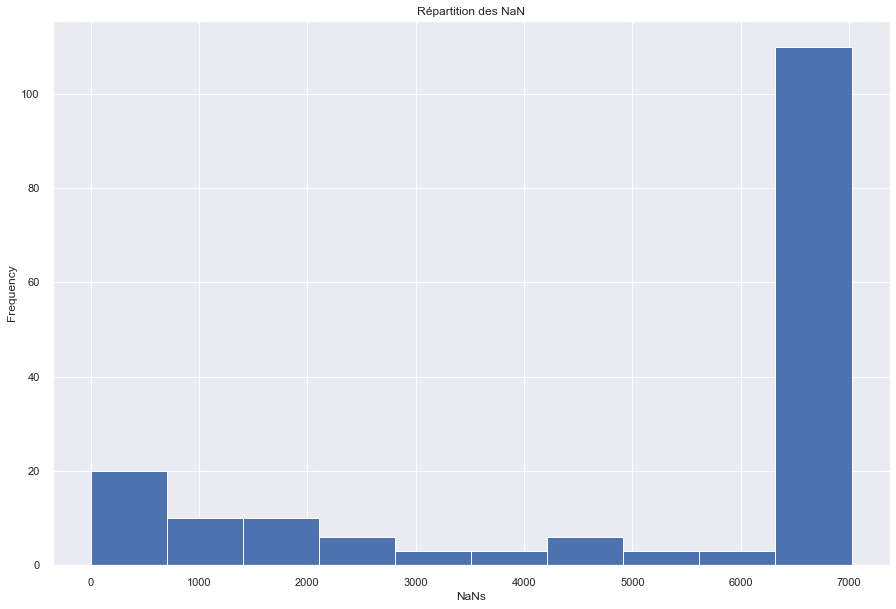

In [64]:
data.isnull().sum().plot(kind='hist', figsize=(15,10))
plt.title('Répartition des NaN')
plt.xlabel('NaNs')

plt.show()

In [65]:
# Nous supprimons toutes les colonnes contenant moins de 20% de données utilisables
data = data.dropna(axis=1, thresh= len(data)*0.2, how='all')

In [66]:
# supprimer toutes les lignes qui (après avoir supprimé certaines colonnes) ne contiennent que des NaN
data = data.dropna(axis=0, how='all')

In [67]:
print('Il y a maintenant {:,} lignes '.format(data.shape[0]) + "et {} colonnes restantes dans nos données".format(data.shape[1]))

Il y a maintenant 7,023 lignes et 61 colonnes restantes dans nos données


In [68]:
data.isnull().sum().sort_values()

code                            0
url                             0
creator                         0
created_t                       0
last_modified_t                 0
                             ... 
manufacturing_places         4661
manufacturing_places_tags    4661
additives_tags               5039
origins                      5435
origins_tags                 5436
Length: 61, dtype: int64

In [69]:
# Statistiques
data.describe()

,created_t,last_modified_t,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,energy_kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_fr_100g
count,7.023000e+03,7.023000e+03,2490.000000,4978.000000,4978.000000,4978.000000,5360.000000,4458.000000,2399.00000,5791.000000,6494.000000,6488.000000,6459.000000,6473.000000,6478.000000,4153.000000,6481.000000,6316.000000,6316.000000,5360.000000
mean,1.501100e+09,1.592289e+09,76.743265,1.443953,0.054841,0.143833,2.828918,2.794302,1427.59283,329.460635,1383.469079,6.443915,2.085605,55.288472,7.172272,4.478759,10.324084,0.635679,0.254275,2.828918
std,6.593993e+07,3.496606e+07,74.950636,2.436531,0.227693,0.414480,8.252049,1.381500,400.18212,112.971063,464.546388,7.893296,3.867798,21.028537,10.280045,4.743632,4.304753,0.987888,0.395166,8.252049
min,1.331999e+09,1.382886e+09,0.000000,0.000000,0.000000,0.000000,-11.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.000000
25%,1.457641e+09,1.582736e+09,30.000000,0.000000,0.000000,0.000000,-4.000000,1.000000,1188.00000,277.000000,1162.250000,1.500000,0.300000,42.000000,1.700000,2.500000,7.600000,0.010000,0.004000,-4.000000
50%,1.513796e+09,1.607093e+09,60.000000,0.000000,0.000000,0.000000,-1.000000,4.000000,1503.00000,350.000000,1473.000000,2.500000,0.500000,65.000000,3.000000,3.400000,11.000000,0.370000,0.148000,-1.000000
75%,1.542551e+09,1.615319e+09,100.000000,2.000000,0.000000,0.000000,8.000000,4.000000,1605.00000,369.000000,1548.000000,8.400000,2.000000,71.000000,5.600000,5.200000,12.500000,1.100000,0.440000,8.000000
max,1.621876e+09,1.621876e+09,1000.000000,17.000000,1.000000,4.000000,30.000000,4.000000,2674.00000,1479.000000,6188.000000,100.000000,120.000000,100.000000,73.000000,72.000000,80.000000,20.000000,8.000000,30.000000


In [70]:
data['product_name'].fillna(value='Product name unavailable', inplace=True)

In [71]:
data.head()

,code,url,creator,created_t,last_modified_t,product_name,generic_name,quantity,packaging,packaging_tags,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_fr_100g
0,3760247570137,https://fr.openfoodfacts.org/produit/376024757...,kiliweb,1621876151,1621876153,Blé poulard,NaN,NaN,NaN,NaN,...,1456.0,2.5,0.48,68.000000,2.00,NaN,12.00,0.625,0.250,NaN
1,3700977701012,https://fr.openfoodfacts.org/produit/370097770...,kiliweb,1563014460,1621861686,Poulet aux 5 légumes du soleil et son blé,NaN,300 g,"fr:Etui en carton, fr:Film en plastique","fr-etui-en-carton,fr-film-en-plastique",...,414.0,2.1,0.50,11.800000,1.40,1.4,7.30,0.900,0.360,NaN
2,7613037397956,https://fr.openfoodfacts.org/produit/761303739...,kiliweb,1570024144,1621857748,LE BON VEGETAL Steak Cru Soja Blé à Griller 2x...,NaN,226 g,Plástico,plastico,...,828.0,13.0,3.60,2.800000,0.50,6.0,14.00,0.730,0.292,-2.0
3,3770019493014,https://fr.openfoodfacts.org/produit/377001949...,foodvisor,1621854431,1621854431,Farine de blé,NaN,NaN,NaN,NaN,...,1448.0,0.9,0.01,68.059998,1.71,NaN,13.27,NaN,NaN,NaN
4,3256540035126,https://fr.openfoodfacts.org/produit/325654003...,openfoodfacts-contributors,1428781797,1621847866,Brioche Tressée Tranchée Pépites,Brioche tressée au levain et aux pépites de ch...,1,"Sachet plastique à jeter, fr:Clip en plastique...","sachet-plastique-a-jeter,fr-clip-en-plastique,...",...,1564.0,16.0,7.80,49.000000,16.00,2.5,8.30,1.000,0.400,16.0


In [72]:
# Nous supprimons tous les doublons de nos données
data.drop_duplicates(inplace=True)
data.head()

,code,url,creator,created_t,last_modified_t,product_name,generic_name,quantity,packaging,packaging_tags,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_fr_100g
0,3760247570137,https://fr.openfoodfacts.org/produit/376024757...,kiliweb,1621876151,1621876153,Blé poulard,NaN,NaN,NaN,NaN,...,1456.0,2.5,0.48,68.000000,2.00,NaN,12.00,0.625,0.250,NaN
1,3700977701012,https://fr.openfoodfacts.org/produit/370097770...,kiliweb,1563014460,1621861686,Poulet aux 5 légumes du soleil et son blé,NaN,300 g,"fr:Etui en carton, fr:Film en plastique","fr-etui-en-carton,fr-film-en-plastique",...,414.0,2.1,0.50,11.800000,1.40,1.4,7.30,0.900,0.360,NaN
2,7613037397956,https://fr.openfoodfacts.org/produit/761303739...,kiliweb,1570024144,1621857748,LE BON VEGETAL Steak Cru Soja Blé à Griller 2x...,NaN,226 g,Plástico,plastico,...,828.0,13.0,3.60,2.800000,0.50,6.0,14.00,0.730,0.292,-2.0
3,3770019493014,https://fr.openfoodfacts.org/produit/377001949...,foodvisor,1621854431,1621854431,Farine de blé,NaN,NaN,NaN,NaN,...,1448.0,0.9,0.01,68.059998,1.71,NaN,13.27,NaN,NaN,NaN
4,3256540035126,https://fr.openfoodfacts.org/produit/325654003...,openfoodfacts-contributors,1428781797,1621847866,Brioche Tressée Tranchée Pépites,Brioche tressée au levain et aux pépites de ch...,1,"Sachet plastique à jeter, fr:Clip en plastique...","sachet-plastique-a-jeter,fr-clip-en-plastique,...",...,1564.0,16.0,7.80,49.000000,16.00,2.5,8.30,1.000,0.400,16.0


##  Exploratoire des données partie 1

In [74]:
countries=data['countries'].value_counts().head(10).to_frame()
s = countries.style.background_gradient(cmap='Blues')
s

,countries
France,5198
en:fr,614
en:france,169
en:France,88
en:FR,79
"France,Suisse",52
"Francia,España",46
"France,en:france",37
"France, Suisse",28
"Belgique,France",28


In [75]:
brands= data['brands'].value_counts().head(10).to_frame()
k = brands.style.background_gradient(cmap='Reds')
k

,brands
U,452
Carrefour,168
Auchan,139
Casino,101
Panzani,88
Leader Price,72
Brossard,66
Barilla,64
Monoprix,59
Tipiak,52


### Exploration du supermarché: Super U

In [76]:
##Filtrer les données et ne gardez que les produits de la marque U:
data1=data[data['brands']=='U']

In [77]:
data1=data1.fillna(0, axis=1)

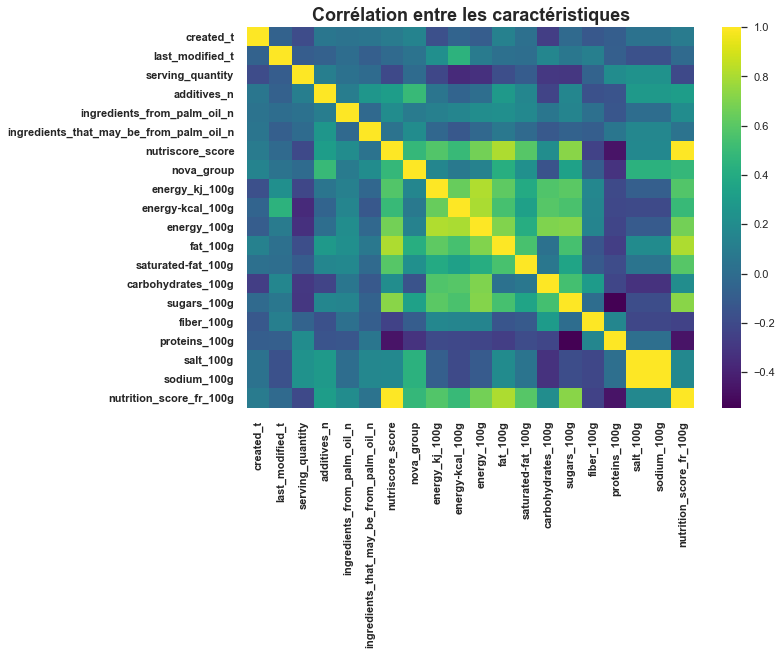

In [78]:
data1_corr=data1.corr()
f,ax=plt.subplots(figsize=(10,7))
sns.heatmap(data1_corr, cmap='viridis')
plt.title("Corrélation entre les caractéristiques", 
          weight='bold', 
          fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

plt.show()

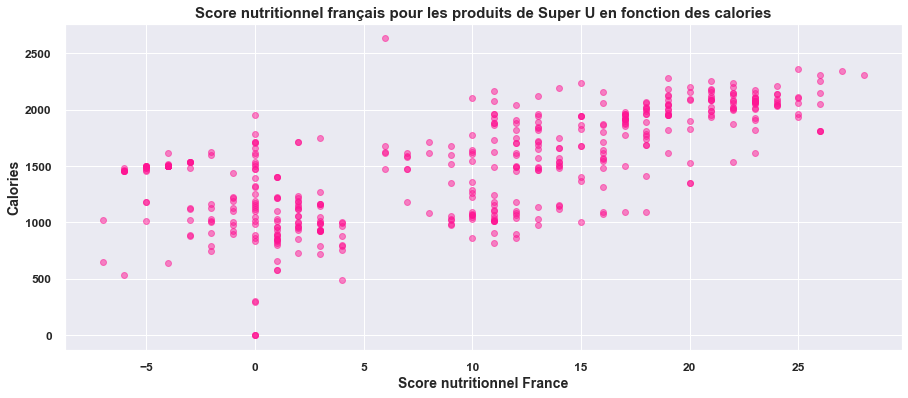

In [79]:
plt.figure(figsize=(15, 6))

plt.scatter(x=data1['nutrition_score_fr_100g'], y=data1['energy_100g'], color='deeppink', alpha=0.5)
plt.title("Score nutritionnel français pour les produits de Super U en fonction des calories", 
          weight='bold', 
          fontsize=15)
plt.xlabel('Score nutritionnel France', weight='bold', fontsize=14)
plt.ylabel('Calories', weight='bold', fontsize=14)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12,weight='bold')


plt.show()

In [80]:
data2=data1[['product_name','energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g']]
print(f"Nous avons {data2.shape[0]} produits dans les supermarchés U et {data2.shape[1]} features")

Nous avons 452 produits dans les supermarchés U et 7 features


## Régime keto: guide d'achat dans le supermarché U

In [81]:
keto= data2[(data2['energy_100g']<2000)&(data2['carbohydrates_100g']<40)&(data2['fat_100g']<165)&(data2['proteins_100g']<75)]
print(f'Nous avons {keto.shape[0]} Produits blé dans le supermarché U')

Nous avons 130 Produits blé dans le supermarché U


En filtrant les colonnes, on aboutit à 130 produits sur 452, ce qui signifie:

"si tu veux aller keto, tu dois abandonnerplus des deux tiers de la nourriture disponible au supermarché"

### La distribution des valeurs nutritives dans les produits céto filtrés:

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

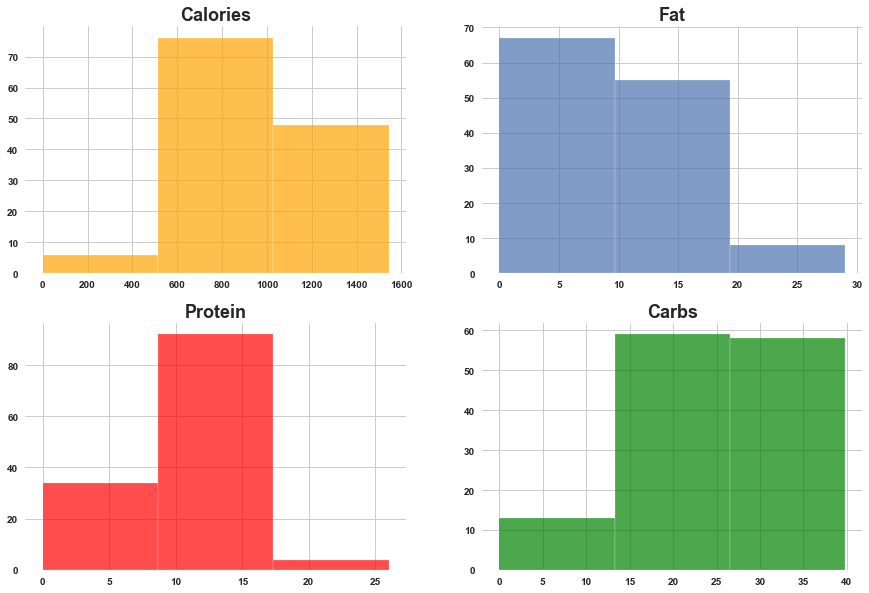

In [82]:
plt.style.use('seaborn')
sns.set_style('whitegrid')

fig= plt.figure(figsize=(15,10))
#2 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((2,2),(0,0))
plt.hist(keto.energy_100g, bins=3, color='orange', alpha=0.7)
plt.title('Calories',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')
#first row sec col
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.hist(keto.fat_100g, bins=3, alpha=0.7)
plt.title('Fat',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')
#Second row first column
ax1 = plt.subplot2grid((2,2), (1, 0))
plt.hist(keto.proteins_100g, bins=3, color='red', alpha=0.7)
plt.title('Protein',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')
#second row second column
ax1 = plt.subplot2grid((2,2), (1, 1))
plt.hist(keto.carbohydrates_100g, bins=3, color='green', alpha=0.7)
plt.title('Carbs',weight='bold', fontsize=18)
plt.yticks(weight='bold')
plt.xticks(weight='bold')

## Élimination des valeurs aberrantes

In [83]:
data.describe()

,created_t,last_modified_t,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,energy_kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_fr_100g
count,7.023000e+03,7.023000e+03,2490.000000,4978.000000,4978.000000,4978.000000,5360.000000,4458.000000,2399.00000,5791.000000,6494.000000,6488.000000,6459.000000,6473.000000,6478.000000,4153.000000,6481.000000,6316.000000,6316.000000,5360.000000
mean,1.501100e+09,1.592289e+09,76.743265,1.443953,0.054841,0.143833,2.828918,2.794302,1427.59283,329.460635,1383.469079,6.443915,2.085605,55.288472,7.172272,4.478759,10.324084,0.635679,0.254275,2.828918
std,6.593993e+07,3.496606e+07,74.950636,2.436531,0.227693,0.414480,8.252049,1.381500,400.18212,112.971063,464.546388,7.893296,3.867798,21.028537,10.280045,4.743632,4.304753,0.987888,0.395166,8.252049
min,1.331999e+09,1.382886e+09,0.000000,0.000000,0.000000,0.000000,-11.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.000000
25%,1.457641e+09,1.582736e+09,30.000000,0.000000,0.000000,0.000000,-4.000000,1.000000,1188.00000,277.000000,1162.250000,1.500000,0.300000,42.000000,1.700000,2.500000,7.600000,0.010000,0.004000,-4.000000
50%,1.513796e+09,1.607093e+09,60.000000,0.000000,0.000000,0.000000,-1.000000,4.000000,1503.00000,350.000000,1473.000000,2.500000,0.500000,65.000000,3.000000,3.400000,11.000000,0.370000,0.148000,-1.000000
75%,1.542551e+09,1.615319e+09,100.000000,2.000000,0.000000,0.000000,8.000000,4.000000,1605.00000,369.000000,1548.000000,8.400000,2.000000,71.000000,5.600000,5.200000,12.500000,1.100000,0.440000,8.000000
max,1.621876e+09,1.621876e+09,1000.000000,17.000000,1.000000,4.000000,30.000000,4.000000,2674.00000,1479.000000,6188.000000,100.000000,120.000000,100.000000,73.000000,72.000000,80.000000,20.000000,8.000000,30.000000


### L'inspection perdante des valeurs min et max révèle qu'il y a des erreurs évidentes dans nos données.

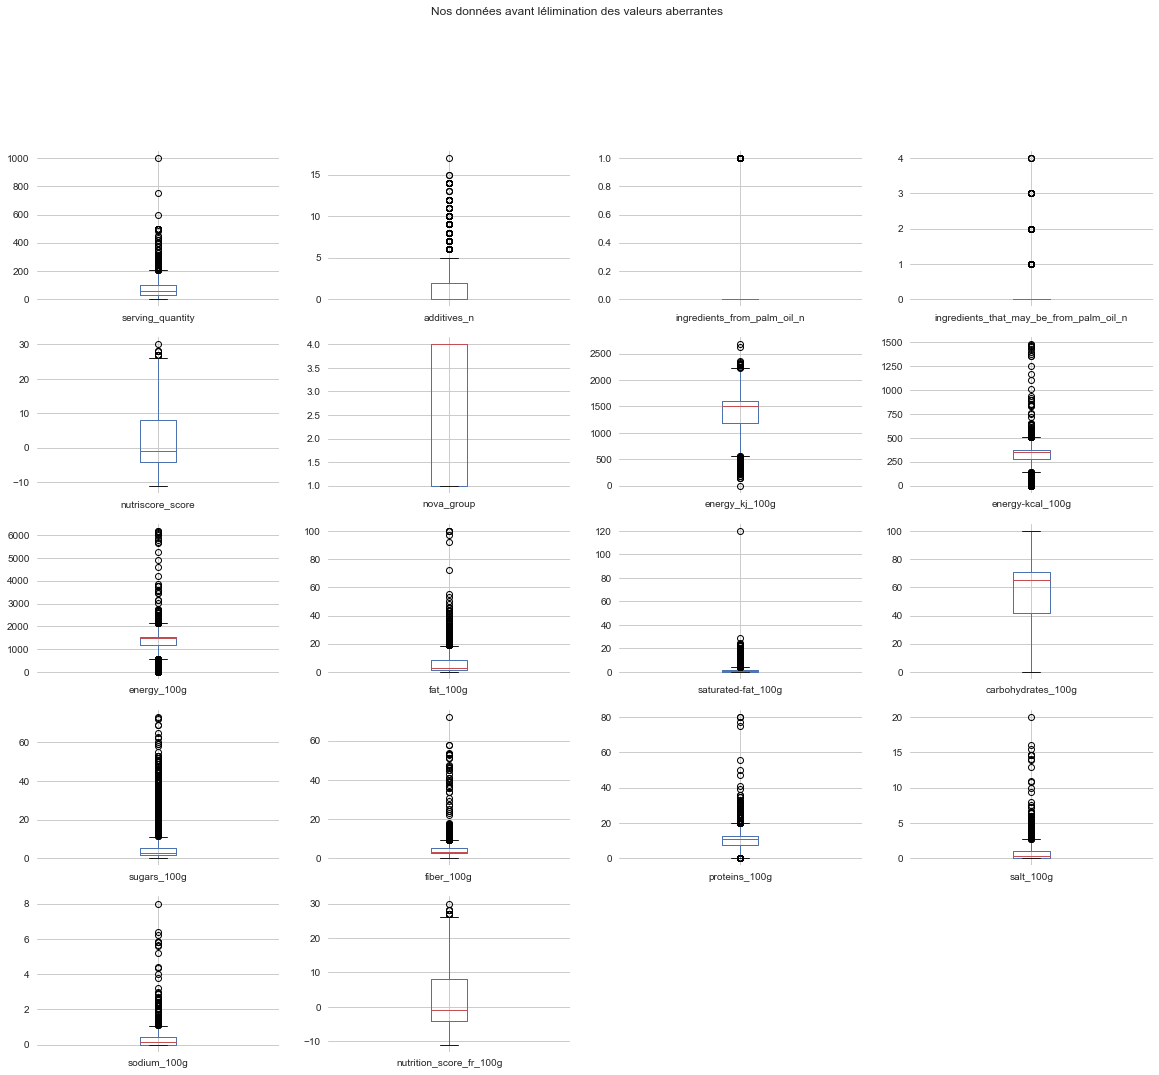

In [84]:
data.select_dtypes(include=float).plot(kind='box', subplots=True, title='Nos données avant lélimination des valeurs aberrantes', figsize=(20,20), layout=(6,4))

plt.show()

## Standardisation

In [85]:
stand_data = data.select_dtypes(include=float).transform(lambda x: (x - x.mean()) / x.std())


In [86]:
stand_data.describe()

,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,energy_kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_fr_100g
count,2.490000e+03,4.978000e+03,4.978000e+03,4.978000e+03,5.360000e+03,4.458000e+03,2.399000e+03,5.791000e+03,6.494000e+03,6.488000e+03,6.459000e+03,6.473000e+03,6.478000e+03,4.153000e+03,6.481000e+03,6.316000e+03,6.316000e+03,5.360000e+03
mean,2.237835e-16,-1.520323e-15,-2.808008e-16,-1.019964e-15,7.817130e-17,-4.807978e-16,2.113080e-16,-2.055954e-16,-4.626556e-16,-1.045814e-15,4.777926e-15,9.159503e-16,5.067316e-15,2.260302e-15,-3.603728e-15,-1.164201e-14,9.827407e-15,7.817130e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.023917e+00,-5.926268e-01,-2.408562e-01,-3.470203e-01,-1.675816e+00,-1.298807e+00,-3.567358e+00,-2.916328e+00,-2.978107e+00,-8.163782e-01,-5.392227e-01,-2.629211e+00,-6.976888e-01,-9.441624e-01,-2.398299e+00,-6.434726e-01,-6.434646e-01,-1.675816e+00
25%,-6.236540e-01,-5.926268e-01,-2.408562e-01,-3.470203e-01,-8.275421e-01,-1.298807e+00,-5.987095e-01,-4.643723e-01,-4.762045e-01,-6.263435e-01,-4.616592e-01,-6.319256e-01,-5.323199e-01,-4.171401e-01,-6.328084e-01,-6.333500e-01,-6.333422e-01,-8.275421e-01
50%,-2.233906e-01,-5.926268e-01,-2.408562e-01,-3.470203e-01,-4.639960e-01,8.727452e-01,1.884321e-01,1.818109e-01,1.927276e-01,-4.996537e-01,-4.099502e-01,4.618261e-01,-4.058613e-01,-2.274121e-01,1.570162e-01,-2.689364e-01,-2.689382e-01,-4.639960e-01
75%,3.102940e-01,2.282124e-01,-2.408562e-01,-3.470203e-01,6.266422e-01,8.727452e-01,4.433161e-01,3.499955e-01,3.541754e-01,2.478160e-01,-2.213268e-02,7.471527e-01,-1.529441e-01,1.520439e-01,5.054682e-01,4.700134e-01,4.699921e-01,6.266422e-01
max,1.231820e+01,6.384507e+00,4.151020e+00,9.303634e+00,3.292647e+00,8.727452e-01,3.114600e+00,1.017552e+01,1.034241e+01,1.185260e+01,3.048618e+01,2.126231e+00,6.403447e+00,1.423408e+01,1.618581e+01,1.960173e+01,1.960120e+01,3.292647e+00


In [87]:
stand_data.dropna(inplace=True)

In [88]:
print('Il y a {:,} lignes '.format(stand_data.shape[0]) + "et {} colonnes dans nos données standardisées".format(stand_data.shape[1]))


Il y a 945 lignes et 18 colonnes dans nos données standardisées


# Exploratoire des données partie 2

- Dans la première moitié de notre enquête, nous nous concentrerons principalement sur les trois domaines suivants:

- Fréquences (comment nos variables sont-elles réparties et quels sont les additifs et ingrédients les plus courants?)
- Caractéristiques (quelles sont les caractéristiques des différentes catégories et pays?)
- Relations (comment les variables sont-elles liées les unes aux autres)
- Nous étudierons par la suite nos données avec des corrélations et des analyses de régression.

## Fréquences
### Distributions

In [89]:
data.describe()

,created_t,last_modified_t,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,energy_kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_fr_100g
count,7.023000e+03,7.023000e+03,2490.000000,4978.000000,4978.000000,4978.000000,5360.000000,4458.000000,2399.00000,5791.000000,6494.000000,6488.000000,6459.000000,6473.000000,6478.000000,4153.000000,6481.000000,6316.000000,6316.000000,5360.000000
mean,1.501100e+09,1.592289e+09,76.743265,1.443953,0.054841,0.143833,2.828918,2.794302,1427.59283,329.460635,1383.469079,6.443915,2.085605,55.288472,7.172272,4.478759,10.324084,0.635679,0.254275,2.828918
std,6.593993e+07,3.496606e+07,74.950636,2.436531,0.227693,0.414480,8.252049,1.381500,400.18212,112.971063,464.546388,7.893296,3.867798,21.028537,10.280045,4.743632,4.304753,0.987888,0.395166,8.252049
min,1.331999e+09,1.382886e+09,0.000000,0.000000,0.000000,0.000000,-11.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.000000
25%,1.457641e+09,1.582736e+09,30.000000,0.000000,0.000000,0.000000,-4.000000,1.000000,1188.00000,277.000000,1162.250000,1.500000,0.300000,42.000000,1.700000,2.500000,7.600000,0.010000,0.004000,-4.000000
50%,1.513796e+09,1.607093e+09,60.000000,0.000000,0.000000,0.000000,-1.000000,4.000000,1503.00000,350.000000,1473.000000,2.500000,0.500000,65.000000,3.000000,3.400000,11.000000,0.370000,0.148000,-1.000000
75%,1.542551e+09,1.615319e+09,100.000000,2.000000,0.000000,0.000000,8.000000,4.000000,1605.00000,369.000000,1548.000000,8.400000,2.000000,71.000000,5.600000,5.200000,12.500000,1.100000,0.440000,8.000000
max,1.621876e+09,1.621876e+09,1000.000000,17.000000,1.000000,4.000000,30.000000,4.000000,2674.00000,1479.000000,6188.000000,100.000000,120.000000,100.000000,73.000000,72.000000,80.000000,20.000000,8.000000,30.000000


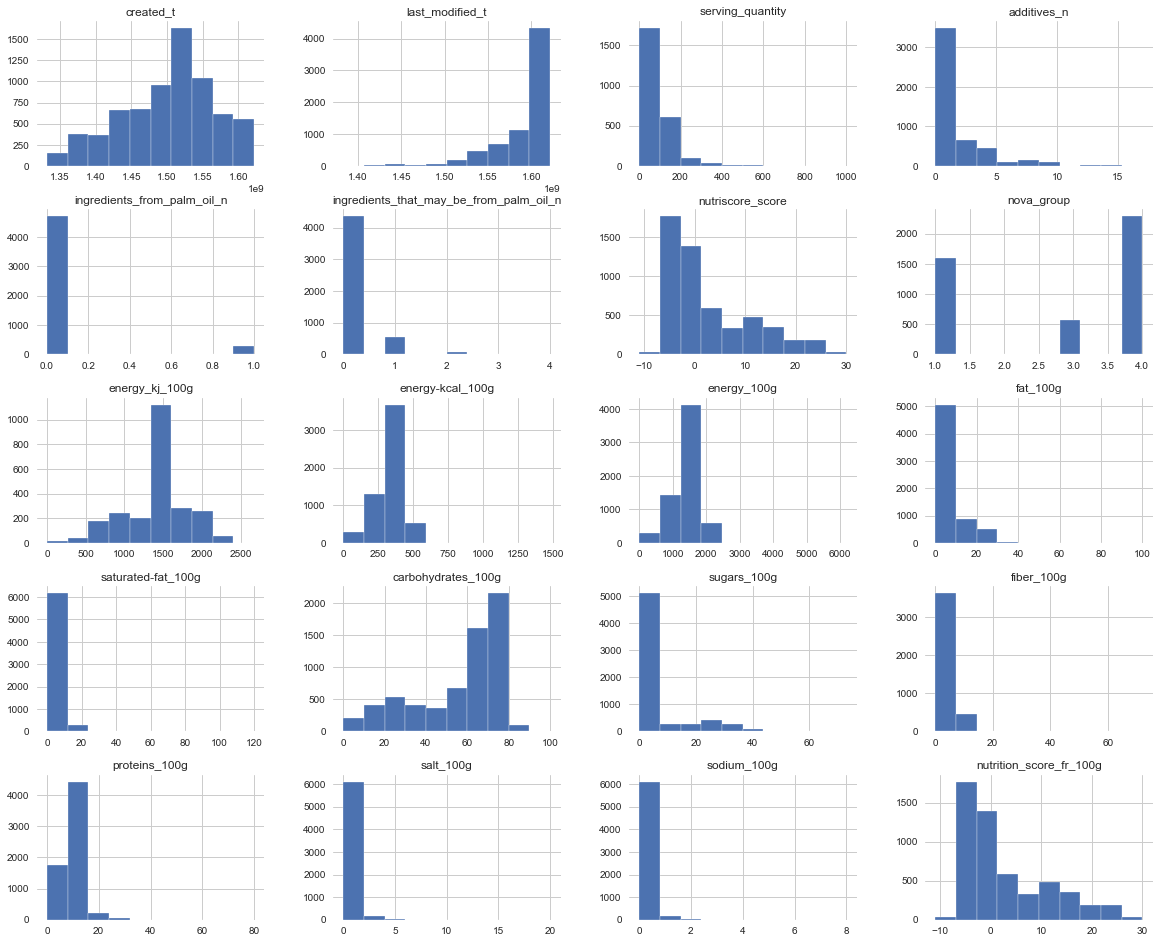

In [90]:
data.hist(figsize=(20,20), layout=(6,4))

plt.show()

### Analyse food packaging

In [91]:
data["packaging"].groupby(data["packaging"]).count().sort_values(ascending=False)


packaging
sachet,plastique                                                       247
Sachet,Plastique                                                       227
Sachet plastique                                                       220
sachet                                                                 125
Carton                                                                  99
                                                                      ... 
carton,atmosphère protectrice,boite, fr:Etui en carton                   1
carton,barquette plastique,plastique                                     1
carton,barquette,plastique                                               1
carton,barquette,plastique, fr:Etui en carton, fr:Film en plastique      1
07 o                                                                     1
Name: packaging, Length: 1628, dtype: int64

### Les deux types d'emballage les plus courants semblent être le plastique, le sachet 

### Analyse du nombre d'additifs (additive count)

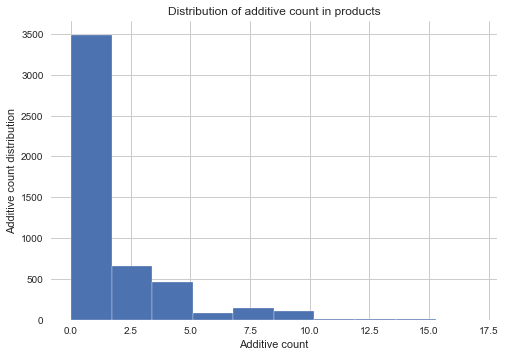

In [92]:
plt.title("Distribution of additive count in products")
plt.xlabel("Additive count")
plt.ylabel("Additive count distribution")
plt.hist(data["additives_n"])
plt.show()

### Nous pouvons voir que la distribution ici est asymétrique et que la plupart des produits ont des additifs dans le champ de (0,5), ce qui est un bon indicateur.

## Regroupons la colonne d'additifs par qualité nutritionnelle

### Le dataframe groupé ici doit être de taille 5, un groupe pour chaque grade ("A", "B", "C", "D", "E").

In [93]:
additives_by_grade=data["additives_n"].groupby(data["nutriscore_grade"])

## Maintenant, traçons un histogramme des distributions.

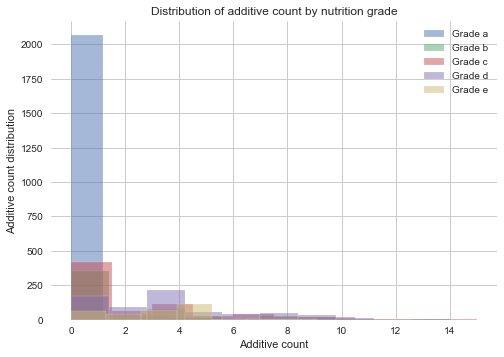

In [94]:
for additive, grade in additives_by_grade:
    plt.hist(grade, label = "Grade {}".format(additive), alpha = 0.5)
plt.title("Distribution of additive count by nutrition grade")
plt.xlabel("Additive count")
plt.ylabel("Additive count distribution")
plt.legend()
plt.show()

### Il ne semble pas que le nombre d'additifs dans les produits affecte les qualités car les distributions sont plus ou moins les mêmes. Mais nous pouvons voir que la note prédominante ici est «D», ce qui signifie que beaucoup de produits ont une note élevée. Nous examinerons ensuite les ingrédients de l'huile de palme.

## Analyse des catégories de produits

### Nous pouvons également regarder les catégories avec le plus grand nombre de produits dans le dataframe. Prenons les 10 catégories avec le plus grand nombre de produits et voyons à quoi elles ressemblent.

In [95]:
num_products_by_category=data.categories.groupby(data.categories).count().sort_values(ascending=False).nlargest(10)

In [96]:
def plot_barh_on_grouped_data(grouped_data,title,y_label,fig_size):
    plt.figure(figsize = fig_size)
    plt.title(title)
    plt.ylabel(y_label)
    plt.barh(range(len(grouped_data)), grouped_data)
    plt.yticks(list(range(len(grouped_data))), grouped_data.index)
    plt.show()

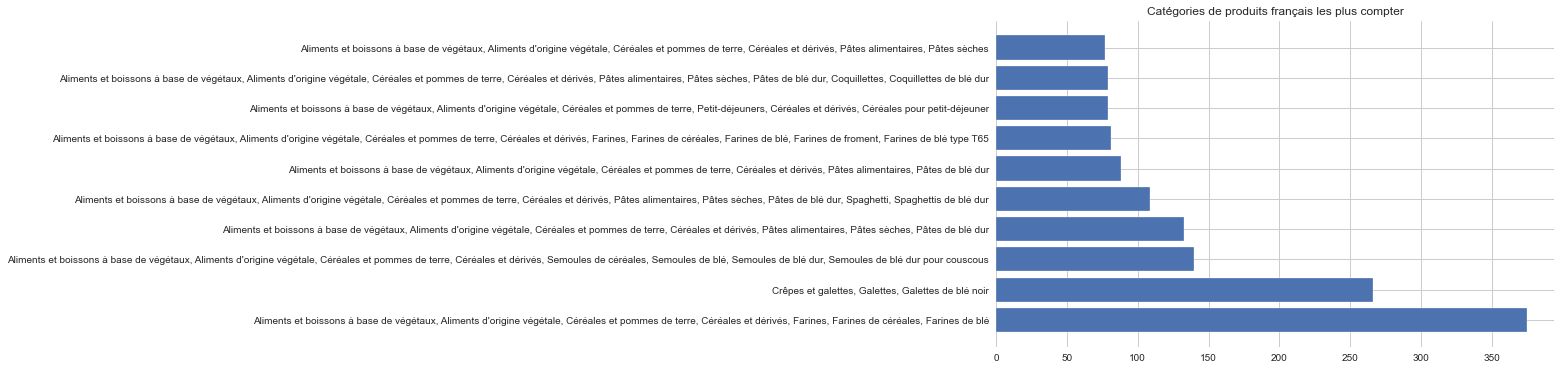

In [97]:
plot_barh_on_grouped_data(num_products_by_category,"Catégories de produits français les plus compter","",(10,6))


### Il semble que la majorité de cette base de données comprend des produits à base de plantes. Dans la plupart des cas, ces produits devraient en fait être ceux qui ont le meilleur score nutritionnel. Cela devrait normalement signifier que la plupart des produits ont des qualités plus élevées. Mais est-ce vraiment le cas?.

### Nous allons regrouper les catégories par grade

In [98]:
grades_by_category

nutriscore_grade
a    2710
b     642
c     877
d     787
e     344
Name: main_category, dtype: int64

In [99]:
grades_by_category=data.main_category.groupby(data.nutriscore_grade).count()


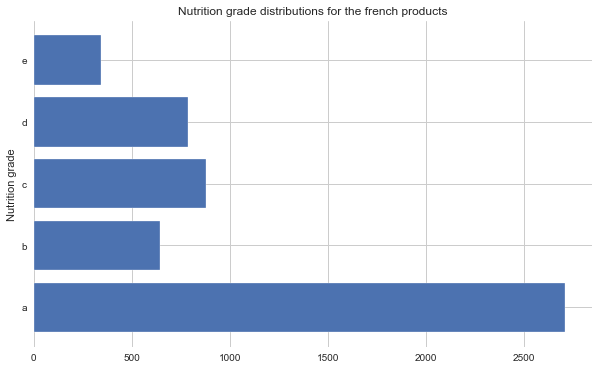

In [100]:
plot_barh_on_grouped_data(grades_by_category,"Nutrition grade distributions for the french products","Nutrition grade",(10,6))

### D'après ce que nous pouvons voir, les trois notes les plus basses sont celles avec le plus petit nombre! Peut-être que les produits français sont aussi sains qu'il y paraît après tout.

## Top 5 des corrélations entre les variables

In [101]:
def get_redundant_pairs(df):
    '''Obtenir des paires diagonales et triangulaires inférieures de matrice de corrélation'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [102]:
print('Le top 5 des corrélations entre les variables sont: \n{}'.format(get_top_abs_correlations(data.select_dtypes(include=float), n=5)))


Le top 5 des corrélations entre les variables sont: 
nutriscore_score  nutrition_score_fr_100g    1.000000
energy_kj_100g    energy_100g                1.000000
salt_100g         sodium_100g                1.000000
energy-kcal_100g  energy_100g                0.993633
energy_kj_100g    energy-kcal_100g           0.970533
dtype: float64


## Word Cloud - Product & catégories

In [103]:
from collections import Counter
from wordcloud import WordCloud

In [104]:
def wordclouding(data, label='product_name', sep=' '):
    """Pour renvoyer un nuage de mot présent dans la colonne 'étiquette', la séparation du mot est l'argument 'sep' '"""
    words = []
    
    for string in data[label]:
        listwords= str(string).split(sep)
        for w in listwords:
            if (w!=' ')and (w!='nan'):
                words.append(w)
    count=Counter(words)
        

    wordcloud = WordCloud(width=1080, height=920, colormap='PuBuGn').fit_words(count)
    plt.figure(figsize=(25,15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.show()

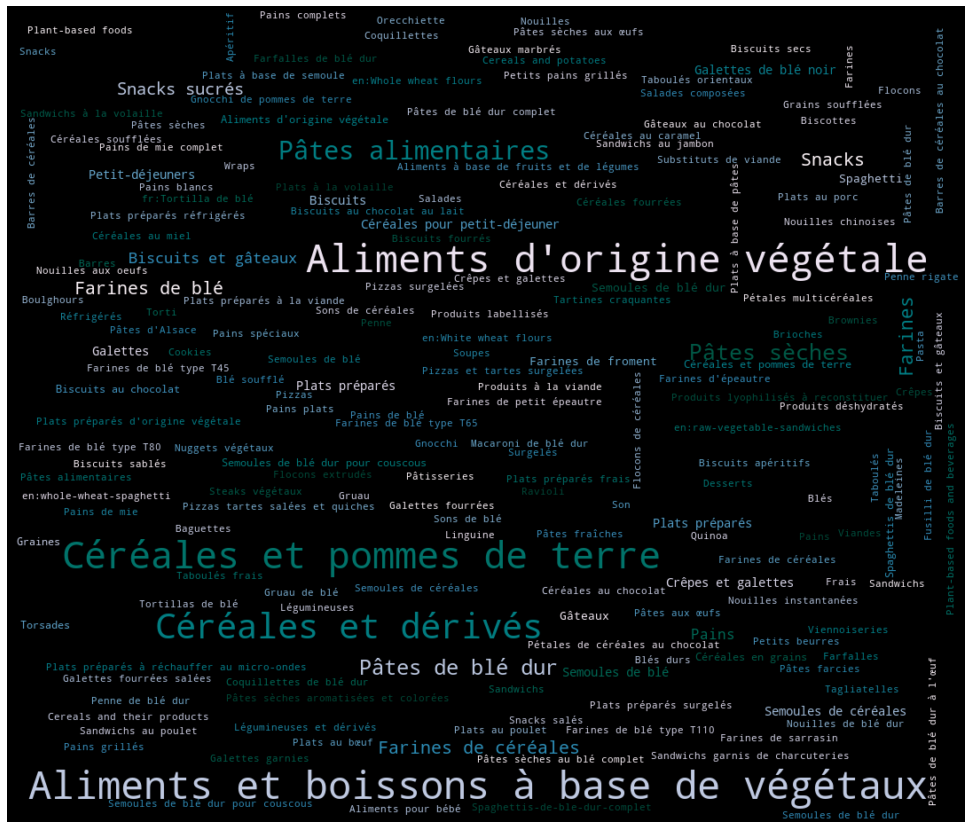

In [110]:
wordclouding(data, label='categories', sep=',')

Note : Nos données sont très désordonnées et de nombreuses entrées sont manifestement erronées. Nous pouvons facilement nettoyer de nombreuses imperfections, mais nous ne savons pas dans quelle mesure nous pouvons faire confiance à nos données nettoyées.

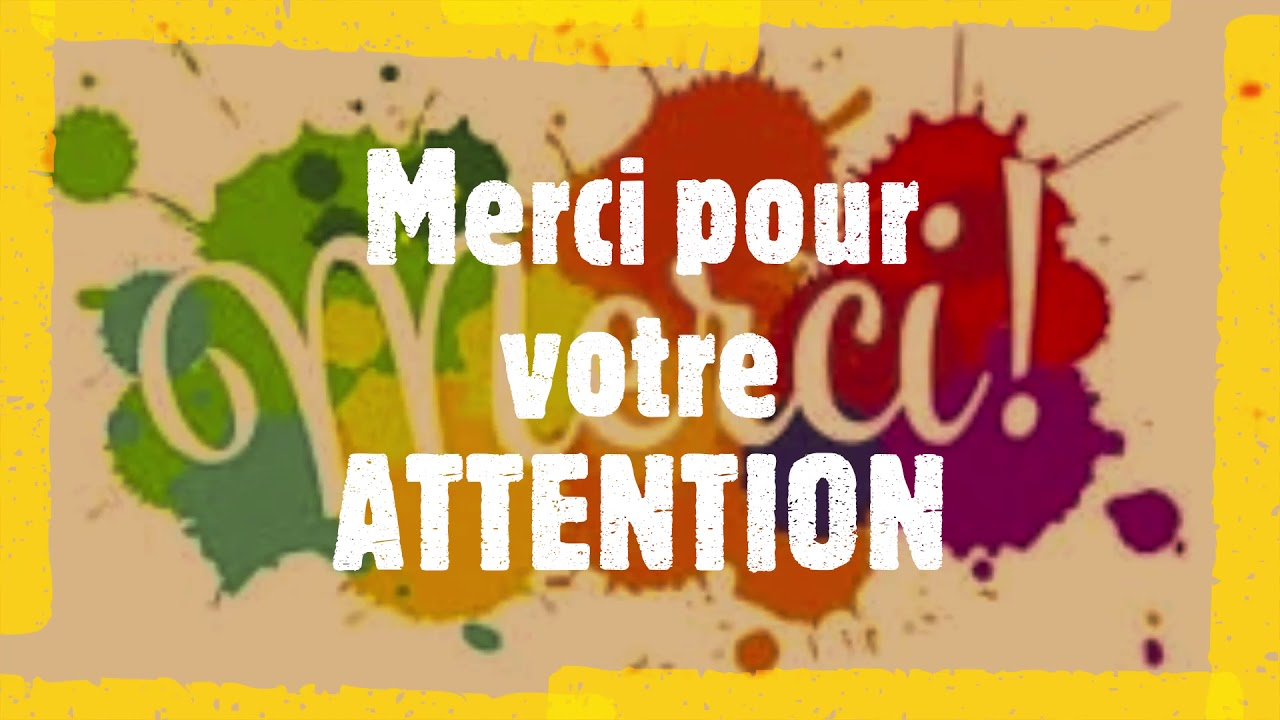